# MNIST Digit Classification
## Using Convolutional Neural Networks (LeNet Architecture) for handwritten digit recognition

## 1. Importing Essential Libraries

In [1]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Core libraries imported successfully!')

Core libraries imported successfully!


## 2. Data Loading & Exploration

In [2]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


### Data Visualization: Sample MNIST Digits

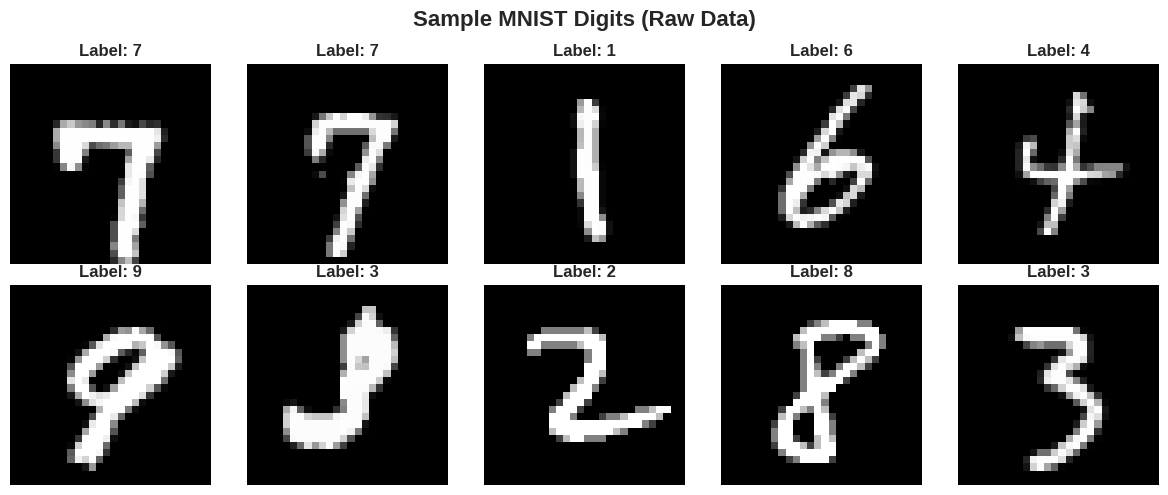

Sample visualization complete!


In [3]:
# Visualize sample MNIST digits before preprocessing
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits (Raw Data)', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    sample_idx = np.random.randint(0, len(x_train))
    ax.imshow(x_train[sample_idx], cmap='gray')
    ax.set_title(f'Label: {y_train[sample_idx]}', fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print('Sample visualization complete!')

### Data Distribution: Digit Frequency

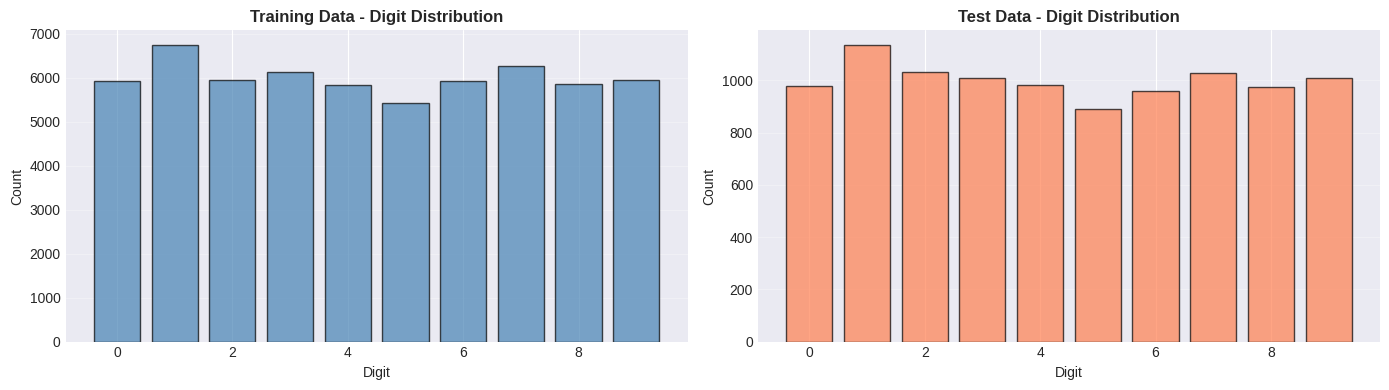

In [4]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Training data distribution
axes[0].bar(range(10), [np.sum(y_train == i) for i in range(10)], color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Training Data - Digit Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Digit')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Test data distribution
axes[1].bar(range(10), [np.sum(y_test == i) for i in range(10)], color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Test Data - Digit Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Digit')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [5]:
# Define image dimensions
width, height = 28, 28
input_shape = (width, height, 1)

print(f'Input shape: {input_shape}')

Input shape: (28, 28, 1)


In [6]:
# Reshape data to add channel dimension
x_train = x_train.reshape(x_train.shape[0], width, height, 1)
x_test = x_test.reshape(x_test.shape[0], width, height, 1)

print(f'Reshaped training data: {x_train.shape}')
print(f'Reshaped test data: {x_test.shape}')

Reshaped training data: (60000, 28, 28, 1)
Reshaped test data: (10000, 28, 28, 1)


In [7]:
# Split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

print(f'Training set: {x_train.shape}')
print(f'Validation set: {x_val.shape}')

Training set: (48000, 28, 28, 1)
Validation set: (12000, 28, 28, 1)


In [8]:
# Normalize data using z-score normalization
x_train = (x_train - x_train.mean()) / x_train.std()
x_val = (x_val - x_val.mean()) / x_val.std()
x_test = (x_test - x_test.mean()) / x_test.std()

print('Data normalized successfully!')

Data normalized successfully!


In [9]:
# One-hot encode labels
num_labels = 10
y_train_encoded = keras.utils.to_categorical(y_train, num_labels)
y_val_encoded = keras.utils.to_categorical(y_val, num_labels)
y_test_encoded = keras.utils.to_categorical(y_test, num_labels)

print(f'Labels encoded. Training labels shape: {y_train_encoded.shape}')

Labels encoded. Training labels shape: (48000, 10)


## 4. Model Architecture (LeNet)

In [10]:
# Build LeNet-5 inspired CNN model
model = Sequential([
 # First Convolutional Block
 Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape),
 AveragePooling2D(pool_size=(2, 2), strides=(1, 1)),

 # Second Convolutional Block
 Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
 AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

 # Third Convolutional Block
 Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),

 # Fully Connected Layers
 Flatten(),
 Dense(84, activation='tanh'),
 Dense(num_labels, activation='softmax')
])

print('Model architecture created successfully!')

Model architecture created successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 23, 23, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 19, 19, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 9, 9, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       252,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303,626 (1.16 MB)

 Trainable params: 303,626 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Model Compilation & Training

In [12]:
# Compile the model
model.compile(
 loss=keras.losses.categorical_crossentropy,
 optimizer=keras.optimizers.Adam(),
 metrics=['accuracy']
)

print('Model compiled successfully!')

Model compiled successfully!


In [13]:
# Train the model
history = model.fit(
 x_train, y_train_encoded,
 batch_size=32,
 epochs=5,
 verbose=1,
 validation_data=(x_val, y_val_encoded)
)

print('Training completed!')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9008 - loss: 0.3229 - val_accuracy: 0.9680 - val_loss: 0.1077
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.9685 - loss: 0.1025 - val_accuracy: 0.9782 - val_loss: 0.0759
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.9727 - loss: 0.0861 - val_accuracy: 0.9756 - val_loss: 0.0775
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 41ms/step - accuracy: 0.9779 - loss: 0.0731 - val_accuracy: 0.9791 - val_loss: 0.0693
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.9787 - loss: 0.0670 - val_accuracy: 0.9764 - val_loss: 0.0729
Training completed!


### Training History Visualization

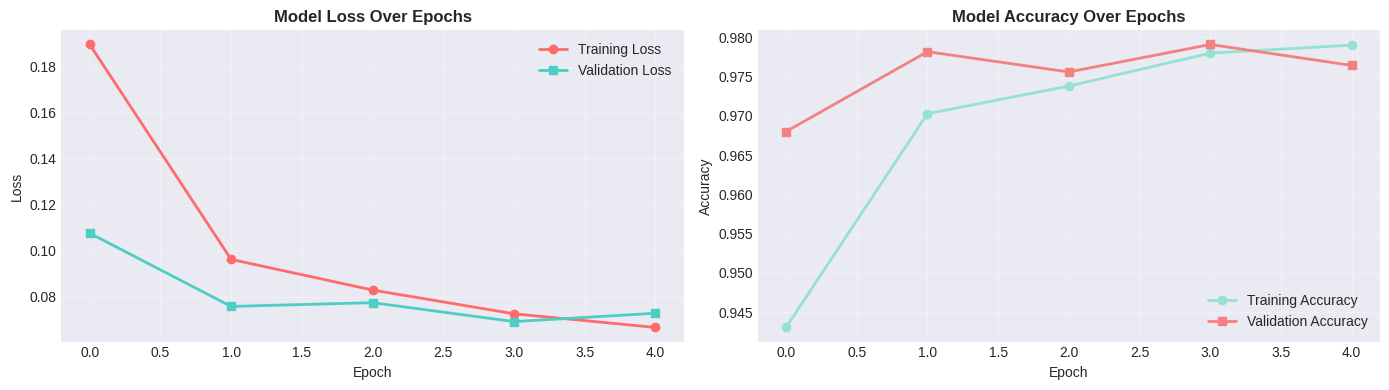

Final Training Accuracy: 0.9790
Final Validation Accuracy: 0.9764


In [14]:
# Visualize training and validation metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot loss
axes[0].plot(history.history['loss'], marker='o', linewidth=2, label='Training Loss', color='#FF6B6B')
axes[0].plot(history.history['val_loss'], marker='s', linewidth=2, label='Validation Loss', color='#4ECDC4')
axes[0].set_title('Model Loss Over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history.history['accuracy'], marker='o', linewidth=2, label='Training Accuracy', color='#95E1D3')
axes[1].plot(history.history['val_accuracy'], marker='s', linewidth=2, label='Validation Accuracy', color='#F38181')
axes[1].set_title('Model Accuracy Over Epochs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Final Training Accuracy: {history.history["accuracy"][-1]:.4f}')
print(f'Final Validation Accuracy: {history.history["val_accuracy"][-1]:.4f}')

## 6. Model Evaluation

In [15]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=1)

print(f'\nTest Results:')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9751 - loss: 0.0801

Test Results:
Test Loss: 0.0641
Test Accuracy: 0.9805 (98.05%)


### Sample Predictions Visualization

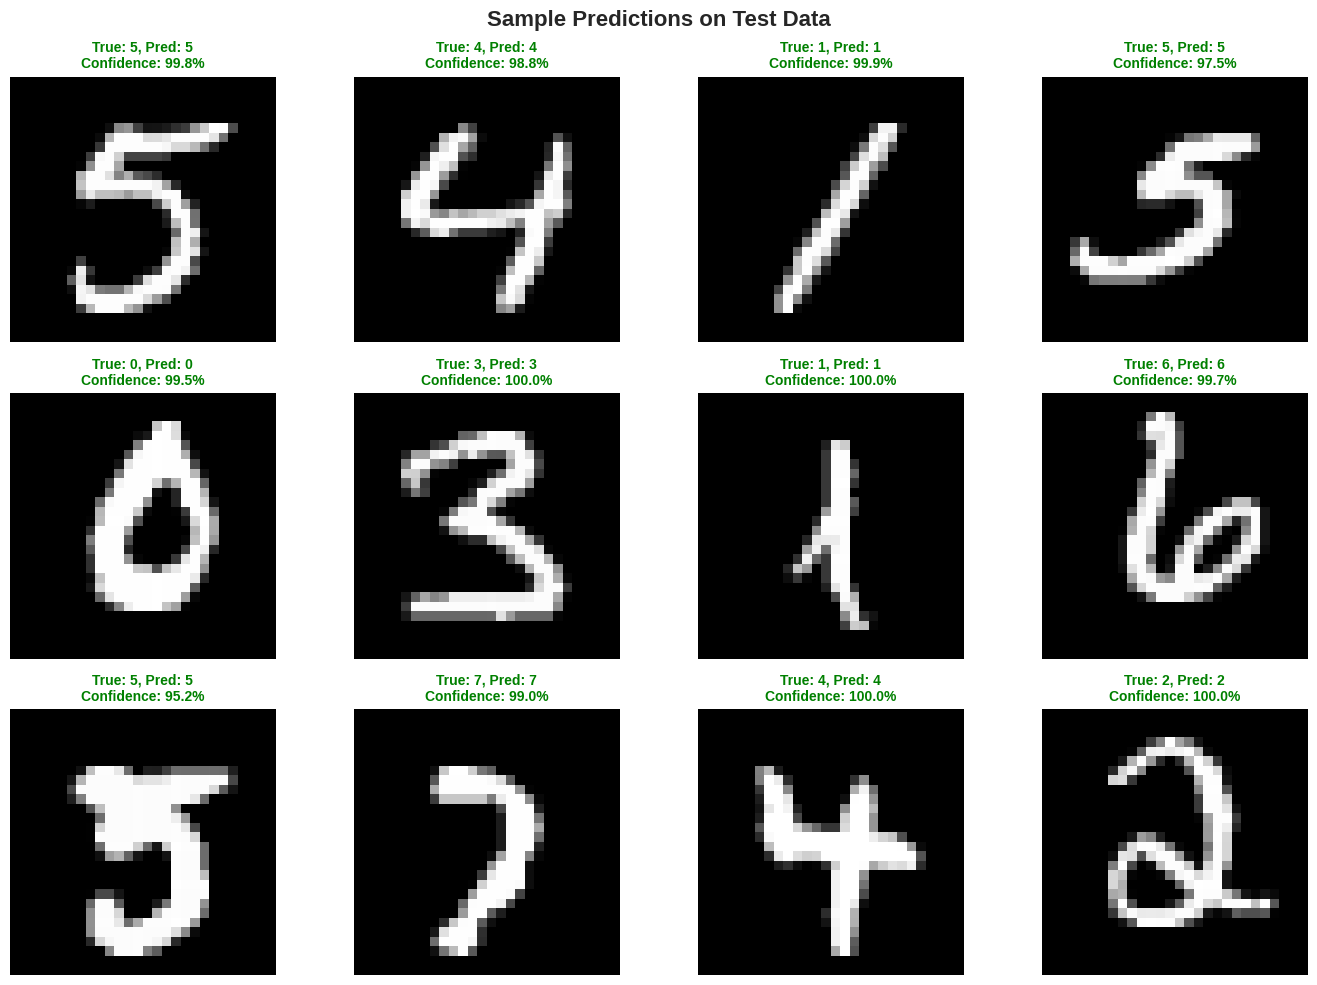

In [16]:
# Generate predictions on a sample of test data
num_samples = 12
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Get predictions
predictions = model.predict(sample_images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
fig.suptitle('Sample Predictions on Test Data', fontsize=16, fontweight='bold')

for idx, ax in enumerate(axes.flat):
    ax.imshow(sample_images[idx].reshape(28, 28), cmap='gray')
    true_label = sample_labels[idx]
    pred_label = predicted_labels[idx]
    confidence = predictions[idx][pred_label] * 100

    # Color code: green if correct, red if incorrect
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}\nConfidence: {confidence:.1f}%',
                 fontweight='bold', color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Confusion Matrix Visualization

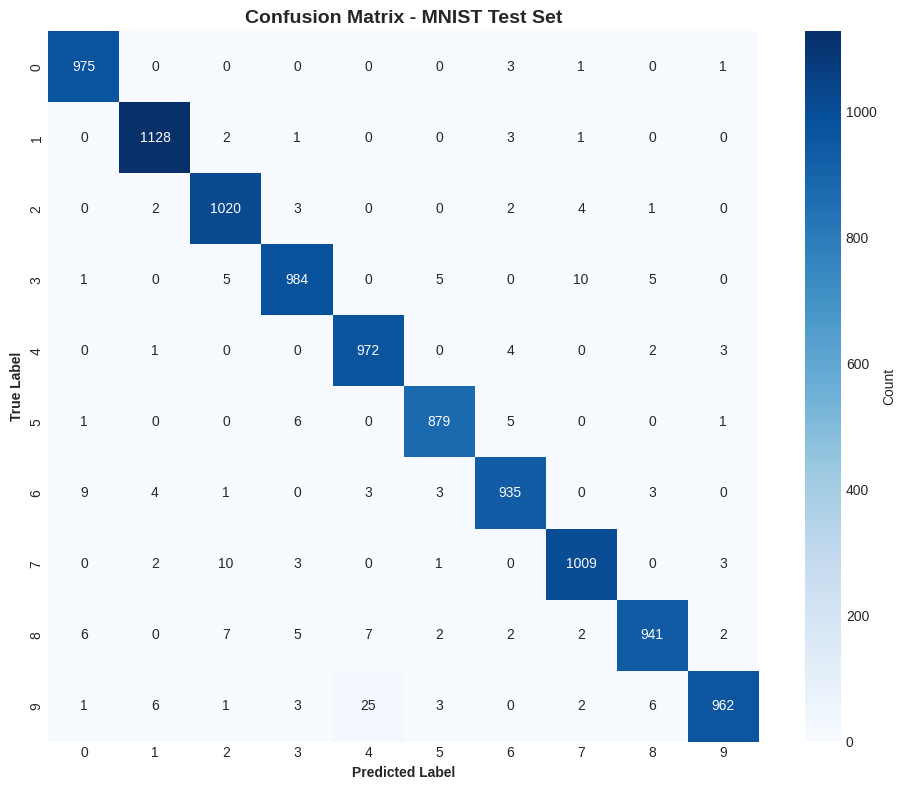

Confusion matrix visualization complete!


In [17]:
# Generate predictions on entire test set for confusion matrix
all_predictions = model.predict(x_test, verbose=0)
all_predicted_labels = np.argmax(all_predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, all_predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'}, square=True)
plt.title('Confusion Matrix - MNIST Test Set', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.tight_layout()
plt.show()

print('Confusion matrix visualization complete!')

### Detailed Classification Report


CLASSIFICATION REPORT - MNIST TEST SET
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



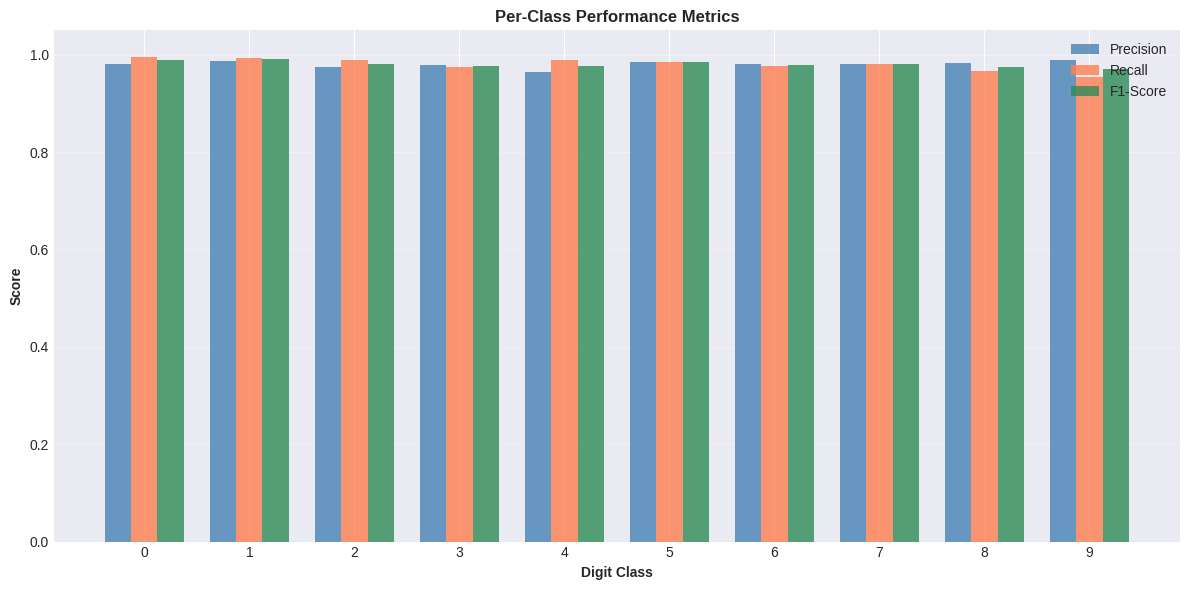

In [18]:
# Generate comprehensive classification report
report = classification_report(y_test, all_predicted_labels,
                               target_names=[str(i) for i in range(10)],
                               output_dict=True)

print('\n' + '='*60)
print('CLASSIFICATION REPORT - MNIST TEST SET')
print('='*60)
print(classification_report(y_test, all_predicted_labels,
                           target_names=[str(i) for i in range(10)]))

# Visualize per-class metrics
metrics_df = pd.DataFrame(report).transpose()
class_metrics = metrics_df.iloc[:10, :3]  # Get only digit classes (0-9)

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(class_metrics.index))
width = 0.25

ax.bar(x - width, class_metrics['precision'], width, label='Precision', alpha=0.8, color='steelblue')
ax.bar(x, class_metrics['recall'], width, label='Recall', alpha=0.8, color='coral')
ax.bar(x + width, class_metrics['f1-score'], width, label='F1-Score', alpha=0.8, color='seagreen')

ax.set_xlabel('Digit Class', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Per-Class Performance Metrics', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_metrics.index)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()